# Predicting Kemenkeu Training Center's Internet Bandwidth Capacity with ARIMA from Scratch

-------

### Project Overview

The office relies on various applications for its business and operational processes, which are based on data communication. Bandwidth, measured in bits per second (bps), represents the speed of data transfer. Insufficient bandwidth can hinder access and cause disruptions. Determining the right amount of bandwidth is crucial for service quality but often doesn't consider past utilization data. Data mining is used to forecast bandwidth utilization. Research data from utilization reports is transformed and used for modeling.

### Import Library

In [1]:
# Import Libraries

# Utility
import pandas as pd  # For Data Table Processing
import numpy as np   # For Mathematical Functions
import math          # For Mathematical Functions

import plotly.express as px  # For Plotting Graphs
import plotly.io as pio
pio.renderers.default = "svg" # static plotly
from matplotlib import pyplot as plt  # For Plotting Graphs

# Statistical Functions
from statsmodels.tsa.stattools import acf, pacf, adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

### Data Inputs

In [2]:
file_path = './dataset.xlsx'  # File location

xls = pd.ExcelFile(file_path)  # Excel File Location
data = pd.read_excel(xls, 'Sheet1')  # Importing Sheet From Excel File
data.head()  # Display Dataset

,Date,Komunikasi Data Kantor Pusat BPPK,Balai Diklat Keuangan Balikpapan,Balai Diklat Keuangan Cimahi,Balai Diklat Keuangan Denpasar,Balai Diklat Keuangan Makassar,Balai Diklat Keuangan Malang,Balai Diklat Keuangan Manado,Balai Diklat Keuangan Medan,Balai Diklat Keuangan Palembang,Balai Diklat Keuangan Pekanbaru,Balai Diklat Keuangan Pontianak,Balai Diklat Keuangan Yogyakarta,Komunikasi Data Kantor Pusat BPPK.1,PKN STAN,Pusdiklat Anggaran dan Perbendaharaan,Pusdiklat Bea dan Cukai,Pusdiklat Keuangan Umum,Pusdiklat Pajak,Pusdiklat Pegawai Magelang
0,2023-05-01,541.81,35.40,10.90,61.82,75.03,30.03,1050.05,64.65,151.69,11892.53,639.18,752.27,96.30,38.40,61.03,115.72,349.18,659.65,35.83
1,2023-05-02,10821.15,5466.11,39545.26,593.67,1425.14,9421.17,13766.77,8718.70,12089.69,24332.40,2968.06,33487.48,102717.86,7397.82,4455.32,45304.10,47579.84,19013.15,2112.34
2,2023-05-03,10122.74,1649.56,14363.84,1797.29,3209.23,1158.07,21437.17,1227.71,13263.70,26919.12,3036.85,27018.20,139675.87,2771.63,4362.88,7909.99,82021.54,24516.92,208.52
3,2023-05-04,4875.63,1070.31,14762.94,2284.83,996.14,9392.69,10484.33,15808.21,9692.37,3029.69,853.99,27015.03,127974.11,6268.73,11412.55,6914.87,83596.85,39402.96,1590.91
4,2023-05-05,11111.51,22221.06,7669.59,2369.36,28691.15,2497.45,15439.79,610.20,6527.28,1720.22,6943.04,736.69,49328.13,21017.58,92343.90,2863.25,1974.63,1363.35,1327.17


This dataset provides an overview of data communication usage (in bits per second, bps) across various financial training centers and offices on different dates. Each row represents a specific date, and the columns indicate the data communication usage for different locations, such as the central office and various financial training centers

In [3]:
# Missing value check
data.isnull().sum()

Date                                     0
Komunikasi Data Kantor Pusat BPPK        0
Balai Diklat Keuangan Balikpapan         0
Balai Diklat Keuangan Cimahi             0
Balai Diklat Keuangan Denpasar           0
Balai Diklat Keuangan Makassar           0
Balai Diklat Keuangan Malang             0
Balai Diklat Keuangan Manado             0
Balai Diklat Keuangan Medan              0
Balai Diklat Keuangan Palembang          0
Balai Diklat Keuangan Pekanbaru          0
Balai Diklat Keuangan Pontianak          0
Balai Diklat Keuangan Yogyakarta         0
Komunikasi Data Kantor Pusat BPPK.1      0
PKN STAN                                 0
Pusdiklat Anggaran dan Perbendaharaan    0
Pusdiklat Bea dan Cukai                  0
Pusdiklat Keuangan Umum                  0
Pusdiklat Pajak                          0
Pusdiklat Pegawai Magelang               0
dtype: int64


This output shows the number of missing values (NaN) for each column in the dataset. The number indicates how many rows in each column do not have a value recorded for that particular column. A value of 0 means that there are no missing values in that column.

In [4]:
# Location List
locations = data.drop(['Date'], axis=1).columns
for location in locations:
  print(f"Location - {location}")

Location - Komunikasi Data Kantor Pusat BPPK
Location - Balai Diklat Keuangan Balikpapan
Location - Balai Diklat Keuangan Cimahi
Location - Balai Diklat Keuangan Denpasar
Location - Balai Diklat Keuangan Makassar
Location - Balai Diklat Keuangan Malang
Location - Balai Diklat Keuangan Manado
Location - Balai Diklat Keuangan Medan
Location - Balai Diklat Keuangan Palembang
Location - Balai Diklat Keuangan Pekanbaru
Location - Balai Diklat Keuangan Pontianak
Location - Balai Diklat Keuangan Yogyakarta
Location - Komunikasi Data Kantor Pusat BPPK.1
Location - PKN STAN
Location - Pusdiklat Anggaran dan Perbendaharaan
Location - Pusdiklat Bea dan Cukai
Location - Pusdiklat Keuangan Umum
Location - Pusdiklat Pajak
Location - Pusdiklat Pegawai Magelang


In [5]:
data['Date'] = pd.to_datetime(data['Date'])  # Convert to Datetime Format
data.set_index('Date', inplace=True) # Set date as index
data.head()

,Komunikasi Data Kantor Pusat BPPK,Balai Diklat Keuangan Balikpapan,Balai Diklat Keuangan Cimahi,Balai Diklat Keuangan Denpasar,Balai Diklat Keuangan Makassar,Balai Diklat Keuangan Malang,Balai Diklat Keuangan Manado,Balai Diklat Keuangan Medan,Balai Diklat Keuangan Palembang,Balai Diklat Keuangan Pekanbaru,Balai Diklat Keuangan Pontianak,Balai Diklat Keuangan Yogyakarta,Komunikasi Data Kantor Pusat BPPK.1,PKN STAN,Pusdiklat Anggaran dan Perbendaharaan,Pusdiklat Bea dan Cukai,Pusdiklat Keuangan Umum,Pusdiklat Pajak,Pusdiklat Pegawai Magelang
Date,,,,,,,,,,,,,,,,,,,
2023-05-01,541.81,35.40,10.90,61.82,75.03,30.03,1050.05,64.65,151.69,11892.53,639.18,752.27,96.30,38.40,61.03,115.72,349.18,659.65,35.83
2023-05-02,10821.15,5466.11,39545.26,593.67,1425.14,9421.17,13766.77,8718.70,12089.69,24332.40,2968.06,33487.48,102717.86,7397.82,4455.32,45304.10,47579.84,19013.15,2112.34
2023-05-03,10122.74,1649.56,14363.84,1797.29,3209.23,1158.07,21437.17,1227.71,13263.70,26919.12,3036.85,27018.20,139675.87,2771.63,4362.88,7909.99,82021.54,24516.92,208.52
2023-05-04,4875.63,1070.31,14762.94,2284.83,996.14,9392.69,10484.33,15808.21,9692.37,3029.69,853.99,27015.03,127974.11,6268.73,11412.55,6914.87,83596.85,39402.96,1590.91
2023-05-05,11111.51,22221.06,7669.59,2369.36,28691.15,2497.45,15439.79,610.20,6527.28,1720.22,6943.04,736.69,49328.13,21017.58,92343.90,2863.25,1974.63,1363.35,1327.17


### Data Exploration

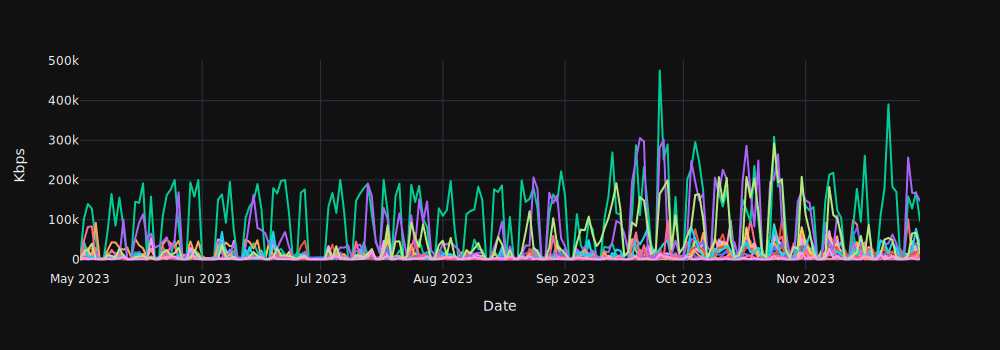

In [6]:
df_plot = data

fig = px.line(df_plot,
              x=df_plot.index,
              y=df_plot.columns,
              template = 'plotly_dark').update_layout(
                  xaxis_title="Date",
                  yaxis_title="Kbps",
                  showlegend = False
              )
fig.update_layout(width = 1000, height=350,showlegend=False)

fig.show()

There are several outlier conditions where the bandwidth capacity exceeds the maximum capacity. This is because, at certain times, the internet service providers open up the maximum capacity, so that whatever bandwidth is needed will be available. This is a special condition based on client requests.

#### Stationary Testing

Stationary data is data that has statistical properties (such as mean, standard deviation) that tend to remain the same over a certain period of time. Non-stationary data, on the other hand, tends to have a varying mean, often due to the influence of seasonality and trends.



Komunikasi Data Kantor Pusat BPPK






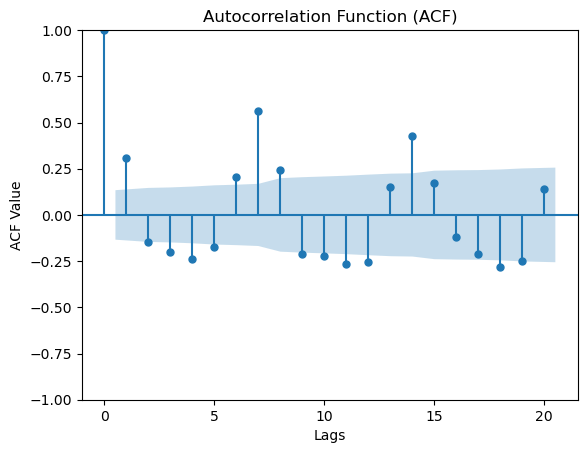



Balai Diklat Keuangan Balikpapan






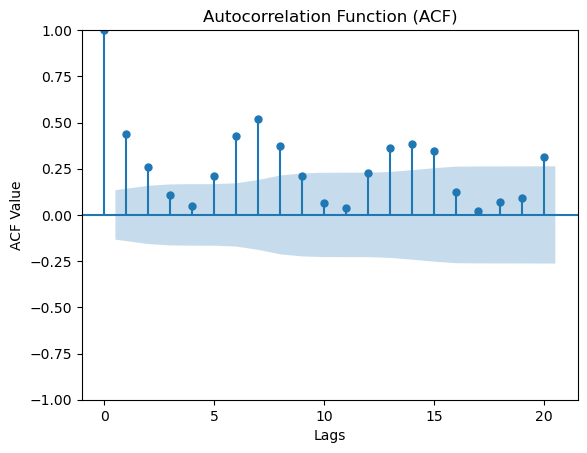



Balai Diklat Keuangan Cimahi






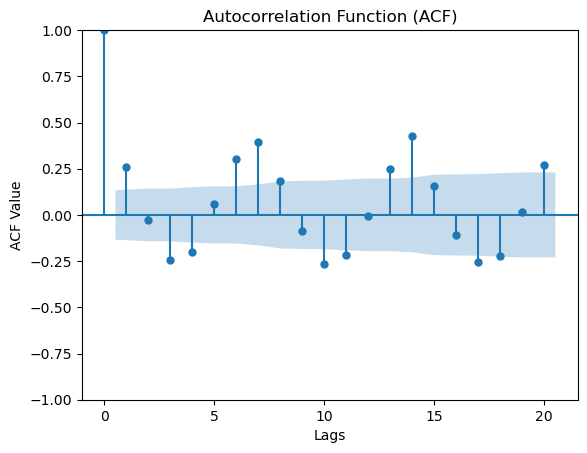

In [7]:
for i in range(3):
  print('\n')
  print(locations[i])
  print('\n')
  print('\n')
  plot_acf(data[locations[i]], lags=20)
  plt.title("Autocorrelation Function (ACF)")
  plt.xlabel("Lags")
  plt.ylabel("ACF Value")
  plt.show()

Based on the ACF (AutoCorrelation Function) test results, stationary data is characterized by ACF values consistently falling within the confidence interval (light blue shaded area on the graph) and typically approaching zero. If the data is non-stationary, ACF values tend to approach -1 or 1 for each lag. From the entire time series dataset, it can be concluded that the dataset has reached a stationary state as the ACF values are still within the confidence interval.

Another way to test the stationarity of a dataset is by using the Augmented Dickey-Fuller (ADF) test

In [8]:
def adf_check(time_series):
    """
    Pass in a time series, returns ADF report
    """
    result = adfuller(time_series)
    labels = ['ADF Test Statistic','p-value','Number of Lags Used','Number of Observations Used']

    return (result[1])

In [9]:
p_value = []
for i in range(len(locations)):
  p_value.append(adf_check(data[locations[i]]))
pd.DataFrame({
    "Timeseries": locations,
    "p Value": p_value,
    "Stationary": ["yes" if item <= 0.05 else "no" for item in p_value]
})

,Timeseries,p Value,Stationary
0,Komunikasi Data Kantor Pusat BPPK,1.637240e-03,yes
1,Balai Diklat Keuangan Balikpapan,2.721128e-01,no
2,Balai Diklat Keuangan Cimahi,1.076110e-01,no
3,Balai Diklat Keuangan Denpasar,1.323277e-02,yes
4,Balai Diklat Keuangan Makassar,3.331184e-01,no
5,Balai Diklat Keuangan Malang,3.259553e-01,no
6,Balai Diklat Keuangan Manado,6.283068e-01,no
7,Balai Diklat Keuangan Medan,4.206828e-01,no
8,Balai Diklat Keuangan Palembang,4.082886e-01,no
9,Balai Diklat Keuangan Pekanbaru,3.602124e-01,no


This table shows the results of the Augmented Dickey-Fuller (ADF) test for each time series in the dataset. The "p Value" column indicates the p-value obtained from the ADF test. If the p-value is less than the significance level (usually 0.05), we reject the null hypothesis, suggesting that the data is stationary. If the p-value is greater than 0.05, we fail to reject the null hypothesis, indicating that the data is non-stationary. The "Stationary" column specifies whether the data is stationary ("yes") or non-stationary ("no") based on the p-value. Based on the ADF test results, 6 time series are stationary, and 13 time series are non-stationary.

### ARIMA Explanation

ARIMA (AutoRegressive Integrated Moving Average) is a popular statistical method used for forecasting time series data. It combines the concepts of autoregression (AR), differencing (I), and moving average (MA) into a single model. The AR part captures the linear relationship between an observation and a number of lagged observations (autoregression), the I part deals with making the time series stationary by differencing it, and the MA part represents the relationship between the observation and a residual error from a moving average model.

#### Fitting AR Model

An autoregressive model describes the relationship between a variable and its own past values. In the context of autoregression, "auto" refers to the fact that the variable itself is used as an input to the model.

In [10]:
def AR(p,df):
  df_temp = df

  #Generating the lagged p terms
  for i in range(1,p+1):
    df_temp['Shifted_values_%d' % i ] = df_temp['Value'].shift(i)

  train_size = (int)(0.8 * df_temp.shape[0])

  #Breaking data set into test and training
  df_train = pd.DataFrame(df_temp[0:train_size])
  df_test = pd.DataFrame(df_temp[train_size:df.shape[0]])

  df_train_2 = df_train.dropna()
  #X contains the lagged values ,hence we skip the first column
  X_train = df_train_2.iloc[:,1:].values.reshape(-1,p)
  #Y contains the value,it is the first column
  y_train = df_train_2.iloc[:,0].values.reshape(-1,1)

  #Running linear regression to generate the coefficents of lagged terms
  from sklearn.linear_model import LinearRegression
  lr = LinearRegression()
  lr.fit(X_train,y_train)

  theta  = lr.coef_.T
  intercept = lr.intercept_
  df_train_2['Predicted_Values'] = X_train.dot(lr.coef_.T) + lr.intercept_
  # df_train_2[['Value','Predicted_Values']].plot()

  X_test = df_test.iloc[:,1:].values.reshape(-1,p)
  df_test['Predicted_Values'] = X_test.dot(lr.coef_.T) + lr.intercept_
  # df_test[['Value','Predicted_Values']].plot()

  RMSE = np.sqrt(mean_squared_error(df_test['Value'], df_test['Predicted_Values']))

  print("The RMSE is :", RMSE,", Value of p : ",p)
  return df_train_2,df_test,theta,intercept,RMSE

#### Fitting MA Model

This model focuses on the relationship between a variable and its past values of an error term or the "moving average" of that variable.

In [11]:
def MA(q,res):

  for i in range(1,q+1):
    res['Shifted_values_%d' % i ] = res['Residuals'].shift(i)

  train_size = (int)(0.8 * res.shape[0])

  res_train = pd.DataFrame(res[0:train_size])
  res_test = pd.DataFrame(res[train_size:res.shape[0]])

  res_train_2 = res_train.dropna()
  X_train = res_train_2.iloc[:,1:].values.reshape(-1,q)
  y_train = res_train_2.iloc[:,0].values.reshape(-1,1)

  from sklearn.linear_model import LinearRegression
  lr = LinearRegression()
  lr.fit(X_train,y_train)

  theta  = lr.coef_.T
  intercept = lr.intercept_
  res_train_2['Predicted_Values'] = X_train.dot(lr.coef_.T) + lr.intercept_
  # res_train_2[['Residuals','Predicted_Values']].plot()

  X_test = res_test.iloc[:,1:].values.reshape(-1,q)
  res_test['Predicted_Values'] = X_test.dot(lr.coef_.T) + lr.intercept_
  # res_test[['Residuals','Predicted_Values']].plot()

  from sklearn.metrics import mean_squared_error
  RMSE = np.sqrt(mean_squared_error(res_test['Residuals'], res_test['Predicted_Values']))

  print("The RMSE is :", RMSE,", Value of q : ",q)
  return res_train_2,res_test,theta,intercept,RMSE

### Training Stationary Dataset

Based on the results of the ACF and ADF tests, the data for communication at the central office of BPPK is stationary. The next step is to perform ARIMA modeling.

#### AR Modelling

In [12]:
RMSE_AR = []

df = pd.DataFrame(data['Komunikasi Data Kantor Pusat BPPK'])
df.columns = ['Value']

for p in range(1,21):
  df_train_2,df_test,theta,intercept,RMSE = AR(p, df)
  RMSE_AR.append(RMSE)

The RMSE is : 7684.094889854563 , Value of p :  1
The RMSE is : 7418.4623003140905 , Value of p :  2
The RMSE is : 7393.469476396996 , Value of p :  3
The RMSE is : 7079.877955713409 , Value of p :  4
The RMSE is : 7050.927085600831 , Value of p :  5
The RMSE is : 7166.618535604835 , Value of p :  6
The RMSE is : 5825.888227750858 , Value of p :  7
The RMSE is : 5918.907237066846 , Value of p :  8
The RMSE is : 5698.522632438761 , Value of p :  9
The RMSE is : 5709.878835764816 , Value of p :  10
The RMSE is : 5649.725020160959 , Value of p :  11
The RMSE is : 5711.330292398732 , Value of p :  12
The RMSE is : 5621.999687629499 , Value of p :  13
The RMSE is : 5683.299465617974 , Value of p :  14
The RMSE is : 5643.377114613016 , Value of p :  15
The RMSE is : 5611.21725144524 , Value of p :  16
The RMSE is : 5712.281056446009 , Value of p :  17
The RMSE is : 5633.084384782259 , Value of p :  18
The RMSE is : 5811.571019955087 , Value of p :  19
The RMSE is : 5710.761926665537 , Value 

From the data, it can be seen that the smallest RMSE value with an AR model is achieved when using p=16, with an RMSE value of 5611.2

In [13]:
df_train_2,df_test,theta,intercept,RMSE = AR(16, pd.DataFrame(df['Value']))

The RMSE is : 5611.21725144524 , Value of p :  16


#### MA Modelling

In this case, since MA uses errors or the level of mistakes, we first find the residual, which is the difference between the actual value and the predicted value.

In [14]:
df_c = pd.concat([df_train_2,df_test])
res = pd.DataFrame()
res['Residuals'] = df_c.Value - df_c.Predicted_Values

In [15]:
df_c[['Value', 'Predicted_Values']]

,Value,Predicted_Values
Date,,
2023-05-17,9130.72,12028.339767
2023-05-18,1455.43,7077.753854
2023-05-19,6934.23,5869.977156
2023-05-20,3186.71,3201.128060
2023-05-21,2604.81,3256.984610
...,...,...
2023-11-26,244.84,-1851.026085
2023-11-27,15699.55,8424.109053
2023-11-28,8520.41,16371.384646


In [16]:
res

,Residuals
Date,
2023-05-17,-2897.619767
2023-05-18,-5622.323854
2023-05-19,1064.252844
2023-05-20,-14.418060
2023-05-21,-652.174610
...,...
2023-11-26,2095.866085
2023-11-27,7275.440947
2023-11-28,-7850.974646


In [17]:
RMSE_MA = []

for q in range(1,21):
  res_train_2,res_test,theta,intercept,RMSE = MA(q, res)
  RMSE_MA.append(RMSE)

The RMSE is : 5632.895292714048 , Value of q :  1
The RMSE is : 5620.122090829805 , Value of q :  2
The RMSE is : 5622.026855851942 , Value of q :  3
The RMSE is : 5625.9465796920485 , Value of q :  4
The RMSE is : 5671.3279712024805 , Value of q :  5
The RMSE is : 5571.0121586192745 , Value of q :  6
The RMSE is : 5574.815923461157 , Value of q :  7
The RMSE is : 5567.206121357767 , Value of q :  8
The RMSE is : 5542.455161441066 , Value of q :  9
The RMSE is : 5565.439211338393 , Value of q :  10
The RMSE is : 5622.738770689103 , Value of q :  11
The RMSE is : 5594.432474766322 , Value of q :  12
The RMSE is : 5731.273263956635 , Value of q :  13
The RMSE is : 5608.542884934939 , Value of q :  14
The RMSE is : 5612.394213337543 , Value of q :  15
The RMSE is : 5466.650706541168 , Value of q :  16
The RMSE is : 5432.870292495242 , Value of q :  17
The RMSE is : 5506.373197505982 , Value of q :  18
The RMSE is : 5611.98142709882 , Value of q :  19
The RMSE is : 5670.601458221933 , Valu

From the modeling results, it can be seen that using q=17 in the MA model yields the lowest RMSE value, which is 5432.8

In [18]:
df_c = pd.concat([df_train_2,df_test])
res = pd.DataFrame()
res['Residuals'] = df_c.Value - df_c.Predicted_Values

res_train_2,res_test,theta,intercept,RMSE = MA(17, res)

The RMSE is : 5432.870292495242 , Value of q :  17


In [19]:
res_c = pd.concat([res_train_2,res_test])

In [20]:
res_c[['Residuals', 'Predicted_Values']]

,Residuals,Predicted_Values
Date,,
2023-06-03,-1597.668999,-1091.560248
2023-06-04,-6234.066435,492.863488
2023-06-05,10845.314698,869.592997
2023-06-06,8951.097518,1514.630458
2023-06-07,62.546344,-562.961630
...,...,...
2023-11-26,2095.866085,2195.603213
2023-11-27,7275.440947,-749.498050
2023-11-28,-7850.974646,-812.230764


In [21]:
df_c.Predicted_Values += res_c.Predicted_Values

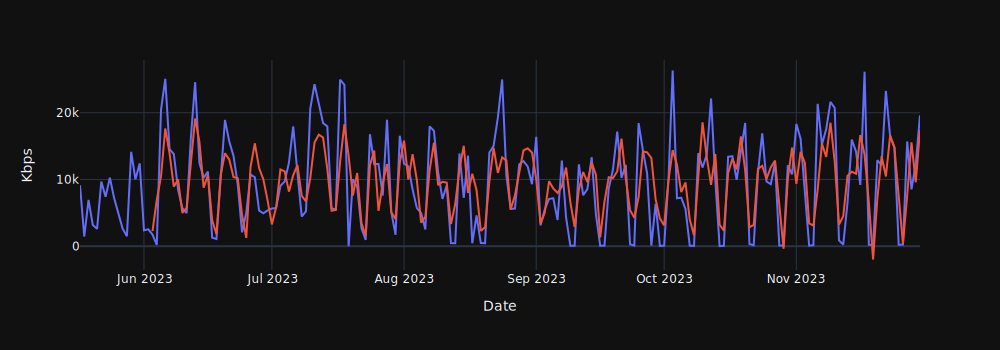

In [22]:
fig = px.line(df_c,
                        x=df_c.index,
                        y=['Value','Predicted_Values'],
                        template = 'plotly_dark').update_layout(
                            xaxis_title="Date",
                            yaxis_title="Kbps",
                        )

fig.update_layout(width = 1000, height=350,showlegend=False)

fig.show()

In [23]:
df_c.dropna(inplace=True)
print(f"RMSE: {np.sqrt(mean_squared_error(df_c.Value, df_c.Predicted_Values))}")

RMSE: 4957.876172149592


### Training Non-Stationary Dataset

Based on the results of the ACF and ADF tests, the data from the Balikpapan financial training center is non-stationary. The next step is to perform differencing until the dataset becomes stationary.

#### Differencing

In [24]:
df = pd.DataFrame(data['Balai Diklat Keuangan Balikpapan'])
df.columns = ['Value']
df.head()

,Value
Date,
2023-05-01,35.40
2023-05-02,5466.11
2023-05-03,1649.56
2023-05-04,1070.31
2023-05-05,22221.06


In [25]:
df_testing = pd.DataFrame(np.log(df.Value).diff().diff(12))
df_testing = df_testing.replace([-np.inf, np.inf], np.nan)
adf_check(df_testing.Value.dropna())

9.612909442708611e-09

Since the p-value is less than 0.05, the dataset is considered stationary.

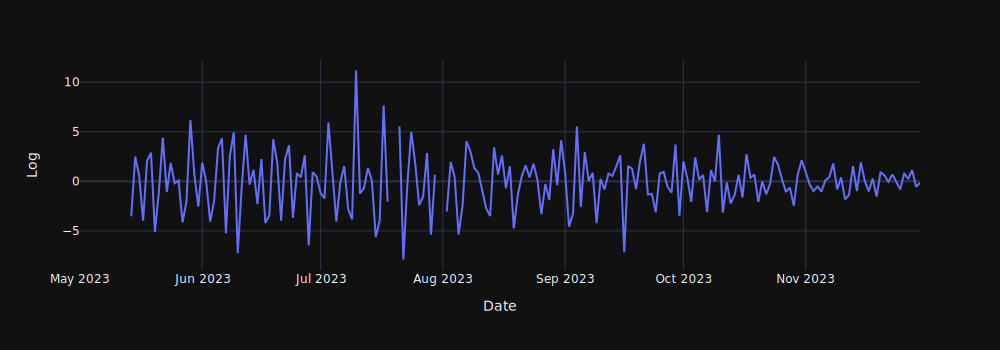

In [26]:
fig = px.line(df_testing,
                        x=df_testing.index,
                        y=df_testing.columns,
                        template = 'plotly_dark').update_layout(
                            xaxis_title="Date",
                            yaxis_title="Log",
                        )

fig.update_layout(width = 1000, height=350,showlegend=False)

fig.show()

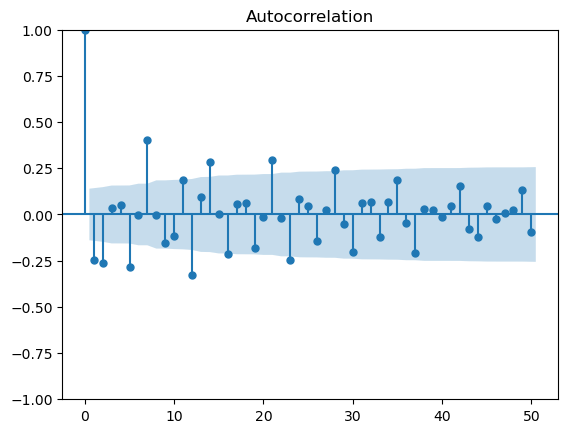

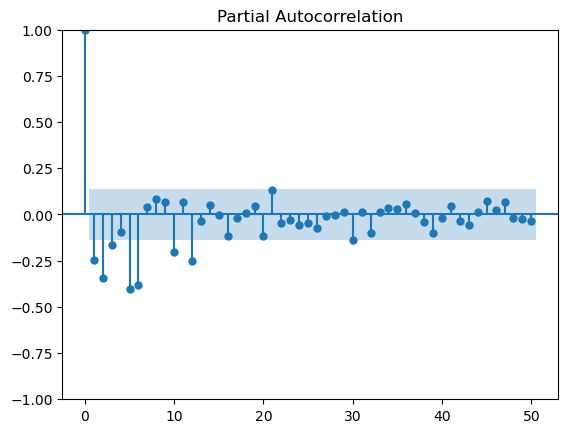

In [27]:
ACF = plot_acf(df_testing.dropna(),lags=50)
PACF = plot_pacf(df_testing.dropna(),lags=50)

In [28]:
df_testing

,Value
Date,
2023-05-01,NaN
2023-05-02,NaN
2023-05-03,NaN
2023-05-04,NaN
2023-05-05,NaN
...,...
2023-11-26,0.829407
2023-11-27,0.229975
2023-11-28,1.132074


#### AR Modelling

In [29]:
RMSE_AR = []

for p in range(1,21):
  df_train_2,df_test,theta,intercept,RMSE = AR(p, df_testing)
  RMSE_AR.append(RMSE)

The RMSE is : 1.1784179419871865 , Value of p :  1
The RMSE is : 1.2949011578033423 , Value of p :  2
The RMSE is : 1.2846197658638285 , Value of p :  3
The RMSE is : 1.2357741890837237 , Value of p :  4
The RMSE is : 0.9649338257332418 , Value of p :  5
The RMSE is : 0.8175803716920943 , Value of p :  6
The RMSE is : 0.8287456885345973 , Value of p :  7
The RMSE is : 0.7800082480015822 , Value of p :  8
The RMSE is : 0.7962971198430927 , Value of p :  9
The RMSE is : 0.8610789923436707 , Value of p :  10
The RMSE is : 0.8263017100865115 , Value of p :  11
The RMSE is : 0.8943333264293215 , Value of p :  12
The RMSE is : 0.9161893003256886 , Value of p :  13
The RMSE is : 0.9159004935729721 , Value of p :  14
The RMSE is : 0.9385746823354484 , Value of p :  15
The RMSE is : 0.961813073717618 , Value of p :  16
The RMSE is : 1.0518276630718553 , Value of p :  17
The RMSE is : 1.086300615343055 , Value of p :  18
The RMSE is : 1.1197709311291568 , Value of p :  19
The RMSE is : 1.1914179

From the data, it can be seen that the smallest RMSE value for the AR model is achieved when using p=8, with an RMSE value of 0.780008 (in log).

In [30]:
df_testing = pd.DataFrame(np.log(df.Value).diff().diff(12))
df_testing = df_testing.replace([-np.inf, np.inf], np.nan)
adf_check(df_testing.Value.dropna())
df_train_2,df_test,theta,intercept,RMSE = AR(8, pd.DataFrame(df_testing))

The RMSE is : 0.7800082480015822 , Value of p :  8


#### MA Modelling

In this case, because MA uses errors or the level of mistakes, we first find the residual, which is the difference between the actual value and the predicted value.







In [31]:
df_c = pd.concat([df_train_2,df_test])
res = pd.DataFrame()
res['Residuals'] = df_c.Value - df_c.Predicted_Values

In [32]:
df_c[['Value', 'Predicted_Values']]

,Value,Predicted_Values
Date,,
2023-05-22,4.392659,3.455619
2023-05-23,-1.082100,-0.795119
2023-05-24,1.853407,-1.982545
2023-05-25,-0.191652,-0.603884
2023-05-26,0.080237,1.183760
...,...,...
2023-11-26,0.829407,-0.505137
2023-11-27,0.229975,-0.822146
2023-11-28,1.132074,-0.392764


In [33]:
res

,Residuals
Date,
2023-05-22,0.937040
2023-05-23,-0.286981
2023-05-24,3.835952
2023-05-25,0.412232
2023-05-26,-1.103523
...,...
2023-11-26,1.334544
2023-11-27,1.052121
2023-11-28,1.524838


In [34]:
RMSE_MA = []

for q in range(1,21):
  res_train_2,res_test,theta,intercept,RMSE = MA(q, res)
  RMSE_MA.append(RMSE)

The RMSE is : 0.7570382337556167 , Value of q :  1
The RMSE is : 0.7533005471983684 , Value of q :  2
The RMSE is : 0.7556418470769694 , Value of q :  3
The RMSE is : 0.7524425901145411 , Value of q :  4
The RMSE is : 0.760364670347359 , Value of q :  5
The RMSE is : 0.7689947440563529 , Value of q :  6
The RMSE is : 0.7958958004794875 , Value of q :  7
The RMSE is : 0.801872887710347 , Value of q :  8
The RMSE is : 0.8070207007618602 , Value of q :  9
The RMSE is : 0.7988912281104795 , Value of q :  10
The RMSE is : 0.7989844307601696 , Value of q :  11
The RMSE is : 0.9052336794743727 , Value of q :  12
The RMSE is : 0.9114114072231762 , Value of q :  13
The RMSE is : 0.9087397349773048 , Value of q :  14
The RMSE is : 0.9098430329560246 , Value of q :  15
The RMSE is : 0.9208832825787631 , Value of q :  16
The RMSE is : 0.9305358655048034 , Value of q :  17
The RMSE is : 0.9313611705781493 , Value of q :  18
The RMSE is : 0.8994102114278 , Value of q :  19
The RMSE is : 0.8965525462

From the modeling results, it can be seen that using q=4 in the MA model yields the lowest RMSE value, which is 0.752443 (in log).

In [35]:
df_c = pd.concat([df_train_2,df_test])
res = pd.DataFrame()
res['Residuals'] = df_c.Value - df_c.Predicted_Values

res_train_2,res_test,theta,intercept,RMSE = MA(4, res)

The RMSE is : 0.7524425901145411 , Value of q :  4


In [36]:
res_c = pd.concat([res_train_2,res_test])

In [37]:
res_c[['Residuals', 'Predicted_Values']]

,Residuals,Predicted_Values
Date,,
2023-05-26,-1.103523,0.077471
2023-05-27,-1.524327,-0.156771
2023-05-28,-1.994392,-0.513035
2023-05-29,2.659510,-0.115101
2023-05-30,2.168046,0.112887
...,...,...
2023-11-26,1.334544,0.024830
2023-11-27,1.052121,-0.019677
2023-11-28,1.524838,0.030957


In [38]:
df_c.Predicted_Values += res_c.Predicted_Values

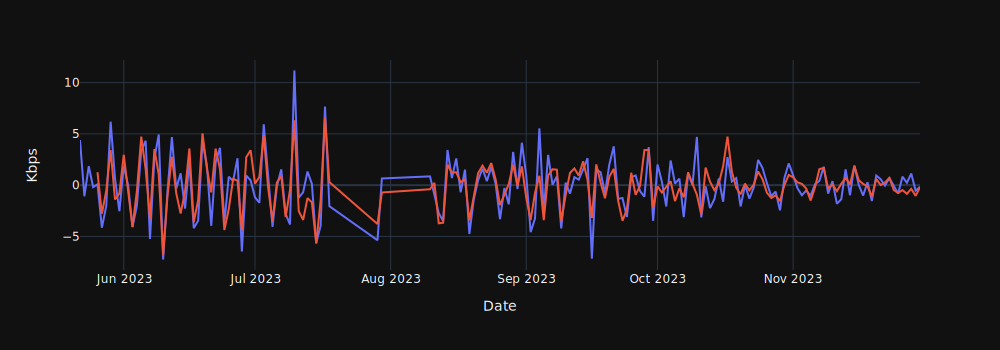

In [39]:
fig = px.line(df_c,
                        x=df_c.index,
                        y=['Value','Predicted_Values'],
                        template = 'plotly_dark').update_layout(
                            xaxis_title="Date",
                            yaxis_title="Kbps",
                        )

fig.update_layout(width = 1000, height=350,showlegend=False)

fig.show()

#### Rollback

In [40]:
df_c.Value += np.log(df).shift(1).Value
df_c.Value += np.log(df).diff().shift(12).Value
df_c.Predicted_Values += np.log(df).shift(1).Value
df_c.Predicted_Values += np.log(df).diff().shift(12).Value
df_c.Value = np.exp(df_c.Value)
df_c.Predicted_Values = np.exp(df_c.Predicted_Values)

In [41]:
df_c

,Value,Shifted_values_1,Shifted_values_2,Shifted_values_3,Shifted_values_4,Shifted_values_5,Shifted_values_6,Shifted_values_7,Shifted_values_8,Predicted_Values
Date,,,,,,,,,,
2023-05-22,4909.75,-1.062032,-5.103278,2.895633,2.031449,-3.961225,0.578889,2.494913,-3.526635,NaN
2023-05-23,3567.39,4.392659,-1.062032,-5.103278,2.895633,2.031449,-3.961225,0.578889,2.494913,NaN
2023-05-24,11716.74,-1.082100,4.392659,-1.062032,-5.103278,2.895633,2.031449,-3.961225,0.578889,NaN
2023-05-25,1639.76,1.853407,-1.082100,4.392659,-1.062032,-5.103278,2.895633,2.031449,-3.961225,NaN
2023-05-26,8066.85,-0.191652,1.853407,-1.082100,4.392659,-1.062032,-5.103278,2.895633,2.031449,26278.646786
...,...,...,...,...,...,...,...,...,...,...
2023-11-26,5114.13,-0.813056,-0.060324,0.689863,-0.039942,0.585162,0.938449,-1.545129,0.286070,1380.289164
2023-11-27,15298.51,0.829407,-0.813056,-0.060324,0.689863,-0.039942,0.585162,0.938449,-1.545129,5238.093698
2023-11-28,35018.34,0.229975,0.829407,-0.813056,-0.060324,0.689863,-0.039942,0.585162,0.938449,7861.599093


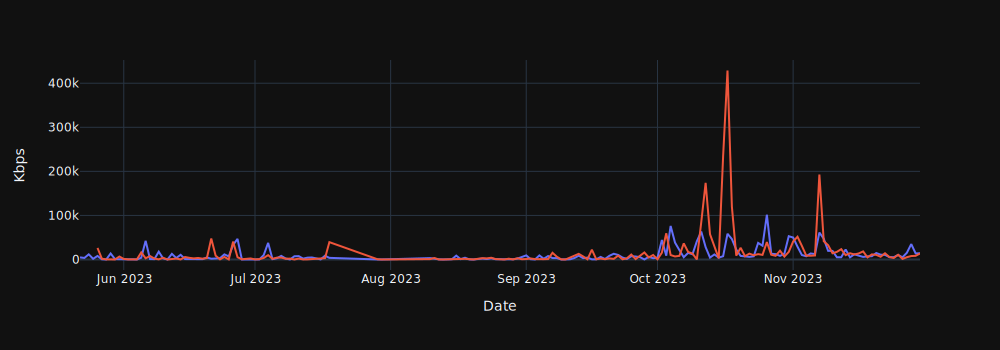

In [42]:
fig = px.line(df_c,
                        x=df_c.index,
                        y=['Value','Predicted_Values'],
                        template = 'plotly_dark').update_layout(
                            xaxis_title="Date",
                            yaxis_title="Kbps",
                        )

fig.update_layout(width = 1000, height=350,showlegend=False)

fig.show()

In [43]:
df_c.dropna(inplace=True)
RMSE = np.sqrt(mean_squared_error(df_c['Value'], df_c['Predicted_Values']))

In [44]:
df_c.dropna(inplace=True)
print(f"RMSE: {np.sqrt(mean_squared_error(df_c.Value, df_c.Predicted_Values))}")

RMSE: 39894.908494940326


### Results from ARIMA Modelling


In the provided examples, the comparison between modeling stationary data and non-stationary data using ARIMA shows significant differences in the RMSE values and model performance.

Modeling Stationary Data:

AR Modeling: The best AR model for the stationary data achieved an RMSE of 5611.2 with p=16.
MA Modeling: The best MA model for the stationary data achieved an RMSE of 5432.8 with q=17.
Combined ARIMA Model: The combined ARIMA model for the stationary data achieved an RMSE of 4957.9.
Modeling Non-Stationary Data:

Differencing: The non-stationary data was differenced until it became stationary.
AR Modeling: The best AR model for the non-stationary data achieved an RMSE of 0.780 with p=8 (in log scale).
MA Modeling: The best MA model for the non-stationary data achieved an RMSE of 0.752 with q=4 (in log scale).
Combined ARIMA Model: The combined ARIMA model for the non-stationary data achieved an RMSE of 39894.9.
Comparison:

The RMSE values for modeling stationary data are relatively low, indicating better predictive performance compared to modeling non-stationary data.
The non-stationary data required differencing to become stationary before modeling, which can impact the complexity and accuracy of the model.
The RMSE for the combined ARIMA model on the non-stationary data is much higher compared to the stationary data, indicating that the model may not be effectively capturing the underlying patterns in the data.
In summary, the comparison highlights the importance of addressing stationarity in time series data and the impact it can have on the performance of ARIMA models.

----